### Machine Learning: Course-End Project Problem Statement


### Project Statement:

Portobello Tech is an app innovator that has devised an intelligent way of predicting employee turnover within the company. It periodically evaluates employees' work details including the number of projects they worked upon, average monthly working hours, time spent in the company, promotions in the last 5 years, and salary level.

Data from prior evaluations show the employee’s satisfaction at the workplace. The data could be used to identify patterns in work style and their interest to continue to work in the company. 

The HR Department owns the data and uses it to predict employee turnover. Employee turnover refers to the total number of workers who leave a company over a certain time period.

As the ML Developer assigned to the HR Department, you have been asked to create ML Programs to

1.	Perform data quality check by checking for missing values if any.
2.	Understand what factors contributed most to employee turnover by EDA.
3.	Perform clustering of Employees who left based on their satisfaction and evaluation.
4.	Handle the left Class Imbalance using SMOTE technique.
5.	Perform k-fold cross-validation model training and evaluate performance. 
6.	Identify the best model and justify the evaluation metrics used. 
7.	Suggest various retention strategies for targeted employees.



Column Name	Description :

satisfaction_level : 	    satisfaction level at the job of an employee
last_evaluation    :    	Rating   between 0 to 1, received by an employee at his last evaluation
number_project     : 	    Number of projects, an employee involved in
average_montly_hours:	Average number of hours in a month, spent by an employee at office
time_spend_company	:   Number of years spent in the company
Work_accident	    :   0 - no accident during employee stay, 1 - accident during employee stay
left	            :   0 indicates employee stays in the company, 1 indicates - employee left the company
promotion_last_5years: 	Number of promotions in his stay
Department          : 	Department, an employee belongs to
salary	            :   Salary in USD

Steps To Perform :

1. 	Perform data quality check by checking for missing values if any.
2.  EDA :Understand what factors contributed most to employee turnover by EDA.
       2.1 : Draw a heatmap of the Correlation Matrix between all numerical features/columns in the data.
       2.2   Draw Distribution Plot  : 
            ■	Employee Satisfaction
            ■	Employee Evaluation 
            ■	Employee Average Monthly Hours 
      2.3 	Draw the bar plot of Employee Project Count of both employees who left and who stayed in the organization (use column number_project and hue column left)  and give your inferences from the plot.    
      
      
3. Perform clustering of Employees who left based on their satisfaction and evaluation.

    3.1 Choose columns satisfaction_level, last_evaluation and left.
    3.2.Do KMeans clustering of employees who left the company into 3 clusters.
    3.3	Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters.
    
4. Class Imbalance using SMOTE technique.

    4.1.	Pre-Process the data by converting categorical columns to numerical columns by
    
    ■	Separating categorical variables and numeric variables. (Label Encoder)
    ■	Applying get_dummies() to the categorical variables.  : one hot encodeing    
    ■	Combining categorical variables and numeric variables
    
    4.2.	Do the stratified split of the dataset to train and test in the ratio 80:20
    
    4.3.	Upsample the train dataset using SMOTE technique from the imblearn module.
    
5. Perform k-fold cross-validation model training and evaluate performance.

    5.1.	Train a Logistic Regression model 
    5.2.	Train a Random Forest Classifier model 
    
6.	Identify the best model and justify the evaluation metrics used. 

    6.1.	Find the ROC/AUC for each model and plot the ROC curve.
    6.2.	Find the confusion matrix for each of the models.
    6.3.	From the confusion matrix, explain which metric needs to be used- Recall or Precision?
    
7. Suggest various retention strategies for targeted employees.

    7.1.	Using the best model, predict the probability of employee turnover in the test data.
    ■	Safe Zone (Green) (Score < 20%)
    ■	Low Risk Zone (Yellow) (20% < Score < 60%)
    ■	Medium Risk Zone (Orange) (60% < Score < 90%)
    ■	High Risk Zone (Red) (Score > 90%).

    


In [1]:
import numpy as nm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_excel("HR.xlsx")

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [5]:
df.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
3394,0.99,0.60,4,259,4,0,0,0,technical,low
5843,0.58,0.77,5,272,2,1,0,0,technical,low
14756,0.78,1.00,5,236,5,0,1,0,sales,medium
1643,0.09,0.83,6,295,5,0,1,0,technical,low
14900,0.37,0.50,2,154,3,0,1,0,hr,medium


In [6]:
# information of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
# check for nan values : isna()

df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

#####  1. We do not have missing values.

In [8]:
# Identify features in the column.

In [9]:
#1.  Check 'left'               : 'categorical'

df['left'].unique()

array([1, 0])

In [10]:
# 0 : stays   1: left the company
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [11]:
# 2. check : promotion_last_5years           : categorical

df['promotion_last_5years'].unique()

array([0, 1])

In [12]:
df['promotion_last_5years'].value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

In [13]:
# 3. number_project                          : categorical data

df['number_project'].unique()

array([2, 5, 7, 6, 4, 3])

In [14]:
df['number_project'].value_counts()

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64

In [15]:
# 4. sales 

df['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [16]:
df['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [17]:
# 5. satisfaction_level 

df['satisfaction_level'].unique()

array([0.38, 0.8 , 0.11, 0.72, 0.37, 0.41, 0.1 , 0.92, 0.89, 0.42, 0.45,
       0.84, 0.36, 0.78, 0.76, 0.09, 0.46, 0.4 , 0.82, 0.87, 0.57, 0.43,
       0.13, 0.44, 0.39, 0.85, 0.81, 0.9 , 0.74, 0.79, 0.17, 0.24, 0.91,
       0.71, 0.86, 0.14, 0.75, 0.7 , 0.31, 0.73, 0.83, 0.32, 0.54, 0.27,
       0.77, 0.88, 0.48, 0.19, 0.6 , 0.12, 0.61, 0.33, 0.56, 0.47, 0.28,
       0.55, 0.53, 0.59, 0.66, 0.25, 0.34, 0.58, 0.51, 0.35, 0.64, 0.5 ,
       0.23, 0.15, 0.49, 0.3 , 0.63, 0.21, 0.62, 0.29, 0.2 , 0.16, 0.65,
       0.68, 0.67, 0.22, 0.26, 0.99, 0.98, 1.  , 0.52, 0.93, 0.97, 0.69,
       0.94, 0.96, 0.18, 0.95])

In [18]:
# 6. last_evaluation 

df['last_evaluation'].unique()

array([0.53, 0.86, 0.88, 0.87, 0.52, 0.5 , 0.77, 0.85, 1.  , 0.54, 0.81,
       0.92, 0.55, 0.56, 0.47, 0.99, 0.51, 0.89, 0.83, 0.95, 0.57, 0.49,
       0.46, 0.62, 0.94, 0.48, 0.8 , 0.74, 0.7 , 0.78, 0.91, 0.93, 0.98,
       0.97, 0.79, 0.59, 0.84, 0.45, 0.96, 0.68, 0.82, 0.9 , 0.71, 0.6 ,
       0.65, 0.58, 0.72, 0.67, 0.75, 0.73, 0.63, 0.61, 0.76, 0.66, 0.69,
       0.37, 0.64, 0.39, 0.41, 0.43, 0.44, 0.36, 0.38, 0.4 , 0.42])

In [19]:
# 7. average_montly_hours

df['average_montly_hours'].unique()

array([157, 262, 272, 223, 159, 153, 247, 259, 224, 142, 135, 305, 234,
       148, 137, 143, 160, 255, 282, 147, 304, 139, 158, 242, 239, 128,
       132, 294, 134, 145, 140, 246, 126, 306, 152, 269, 127, 281, 276,
       182, 273, 307, 309, 225, 226, 308, 244, 286, 161, 264, 277, 275,
       149, 295, 151, 249, 291, 232, 130, 129, 155, 265, 279, 284, 221,
       154, 150, 267, 257, 177, 144, 289, 258, 263, 251, 133, 216, 300,
       138, 260, 183, 250, 292, 283, 245, 256, 278, 240, 136, 301, 243,
       296, 274, 164, 146, 261, 285, 141, 297, 156, 287, 219, 254, 228,
       131, 252, 236, 270, 298, 192, 248, 266, 238, 229, 233, 268, 231,
       253, 302, 271, 290, 235, 293, 241, 218, 199, 180, 195, 237, 227,
       172, 206, 181, 217, 310, 214, 198, 211, 222, 213, 202, 184, 204,
       288, 220, 299, 303, 212, 196, 179, 205, 230, 203, 280, 169, 188,
       178, 175, 166, 163, 168, 165, 189, 162, 215, 193, 176, 191, 174,
       201, 208, 171, 111, 104, 106, 100, 194, 209, 185, 200, 20

In [20]:
# time_spend_company

df['time_spend_company'].unique()

array([ 3,  6,  4,  5,  2,  8, 10,  7])

In [21]:
# Work_accident                     : categorical

df['Work_accident'].unique()

array([0, 1])

In [22]:
df['Work_accident'].value_counts()

0    12830
1     2169
Name: Work_accident, dtype: int64

In [23]:
# salary

df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [24]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

### Step : 2 Exploratory Data Analysis EDA

In [25]:
# 1. CORRELATION MATRIX

df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


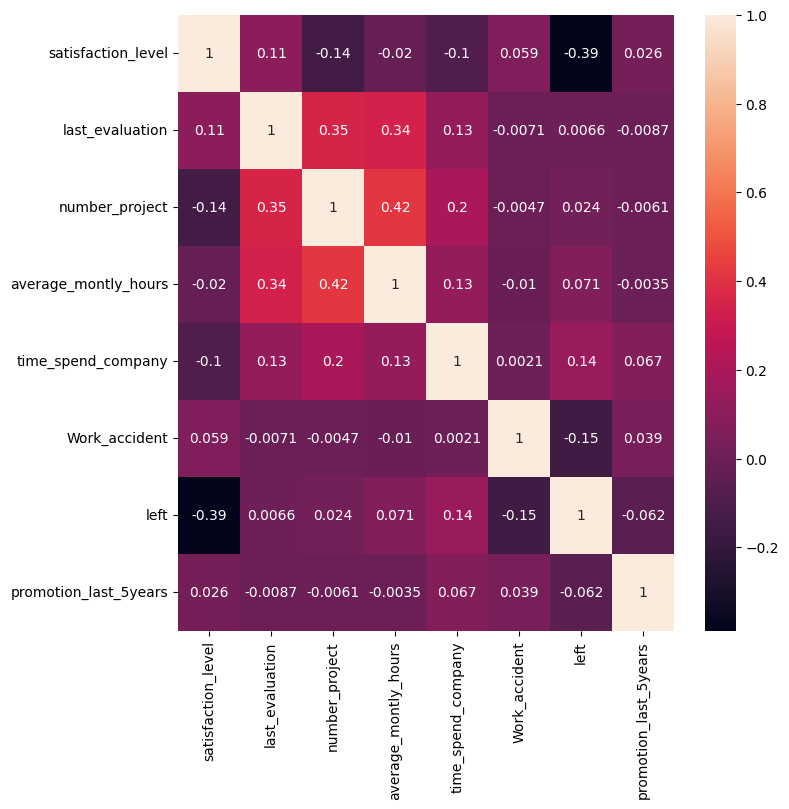

In [26]:
# heatmap

plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

2.2   Draw Distribution Plot  : 
            ■	Employee Satisfaction
            ■	Employee Evaluation 
            ■	Employee Average Monthly Hours 

<ipython-input-27-3b90ac9975fe>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['satisfaction_level'])


<Axes: xlabel='satisfaction_level', ylabel='Density'>

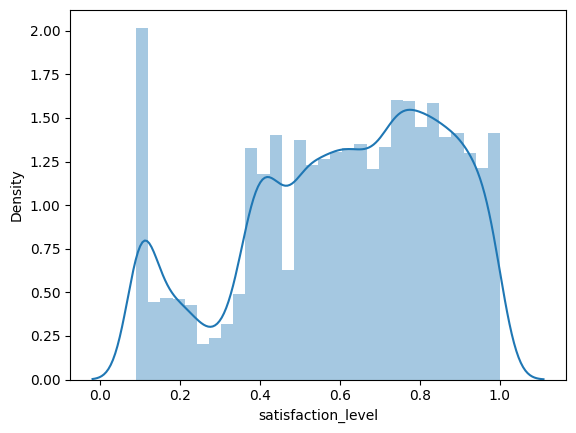

In [27]:
sns.distplot(df['satisfaction_level'])

<ipython-input-28-39209e4ffe9d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['last_evaluation'])


<Axes: xlabel='last_evaluation', ylabel='Density'>

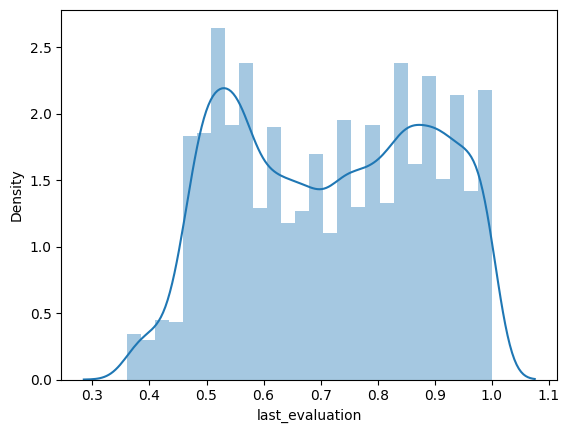

In [28]:
sns.distplot(df['last_evaluation'])

<ipython-input-29-27b4707b93c7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['average_montly_hours'])


<Axes: xlabel='average_montly_hours', ylabel='Density'>

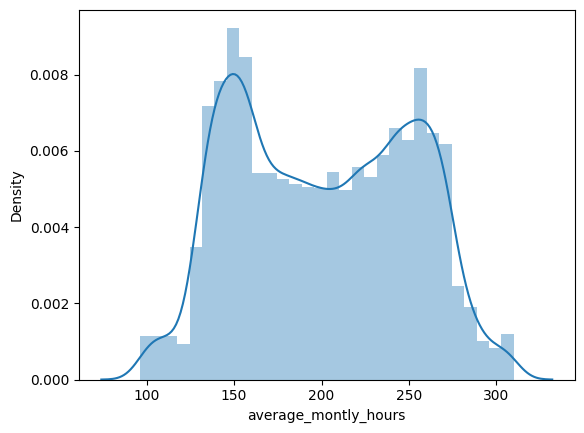

In [29]:
sns.distplot(df['average_montly_hours'])

<Axes: xlabel='sales'>

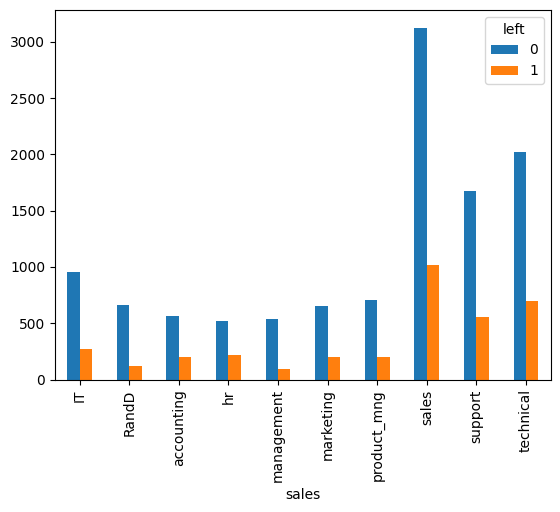

In [30]:
# Bi-Variate Analysis :

# Department wise no of left and stay.

df.groupby(['sales'])['left'].value_counts().unstack().plot.bar()



<Axes: xlabel='number_project'>

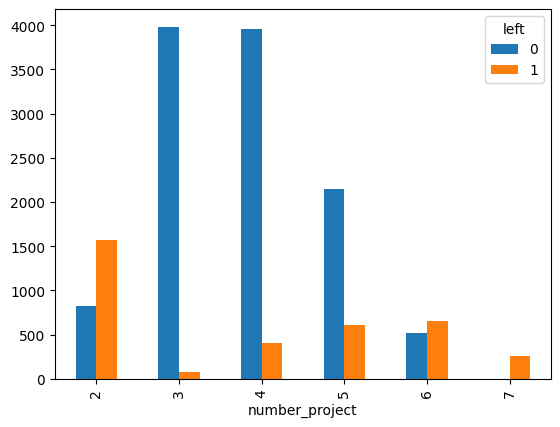

In [31]:
df.groupby(['number_project'])['left'].value_counts().unstack().plot.bar()

In [32]:
df.groupby(['salary'])['left'].value_counts().unstack()


left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


<Axes: xlabel='salary'>

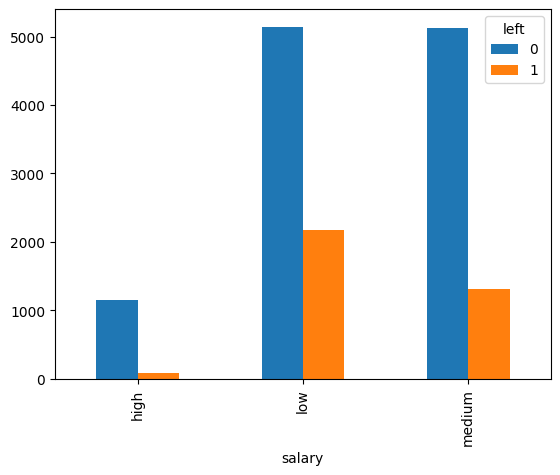

In [33]:
df.groupby(['salary'])['left'].value_counts().unstack().plot.bar()

In [34]:
# 3. Perform clustering of Employees who left based on their 'satisfaction' and 'evaluation'

In [35]:
# 3.1 Choose columns satisfaction_level, last_evaluation and left.
    
dfclus = df[['satisfaction_level', 'last_evaluation', 'left']]

In [36]:
dfclus.head()

,satisfaction_level,last_evaluation,left
0,0.38,0.53,1
1,0.80,0.86,1
2,0.11,0.88,1
3,0.72,0.87,1
4,0.37,0.52,1


In [37]:
# 3.2.Do KMeans clustering of employees who left the company into 3 clusters.

In [38]:
from sklearn.cluster import KMeans

In [39]:
km = KMeans(n_clusters=3, max_iter=30000  )
label = km.fit_predict(dfclus)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [40]:
nm.unique(label)

array([0, 1, 2], dtype=int32)

In [41]:
dfclus[label == 0].describe()

,satisfaction_level,last_evaluation,left
count,3571.000000,3571.000000,3571.0
mean,0.440098,0.718113,1.0
std,0.263933,0.197673,0.0
min,0.090000,0.450000,1.0
25%,0.130000,0.520000,1.0
50%,0.410000,0.790000,1.0
75%,0.730000,0.900000,1.0
max,0.920000,1.000000,1.0


In [42]:
dfclus[label == 1].describe()

,satisfaction_level,last_evaluation,left
count,6734.000000,6734.000000,6734.0
mean,0.812912,0.738606,0.0
std,0.108087,0.155161,0.0
min,0.600000,0.360000,0.0
25%,0.720000,0.610000,0.0
50%,0.810000,0.740000,0.0
75%,0.910000,0.870000,0.0
max,1.000000,1.000000,0.0


In [43]:
dfclus[label == 2].describe()

,satisfaction_level,last_evaluation,left
count,4694.000000,4694.000000,4694.0
mean,0.457211,0.682288,0.0
std,0.153087,0.165820,0.0
min,0.120000,0.360000,0.0
25%,0.350000,0.550000,0.0
50%,0.510000,0.670000,0.0
75%,0.570000,0.810000,0.0
max,0.690000,1.000000,0.0


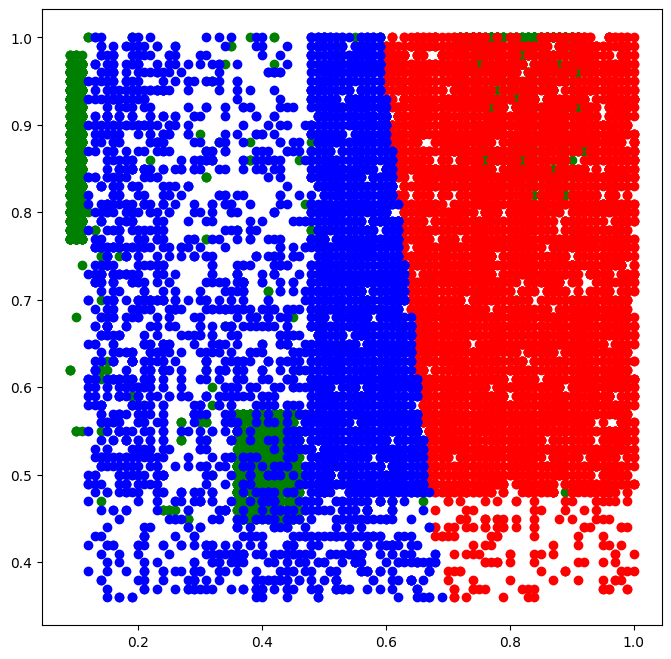

In [44]:
# 3.3 Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters.

# Scatter PLot 

dfclus1 = dfclus.iloc[: ].values

plt.figure(figsize = (8,8))

plt.scatter(dfclus1[label == 0,0], dfclus1[label == 0,1],color = 'green')
plt.scatter(dfclus1[label == 1,0], dfclus1[label == 1,1],color = 'red')
plt.scatter(dfclus1[label == 2,0], dfclus1[label == 2,1],color = 'blue')

plt.show()

In [45]:
# Green : (0.813551, 0.739526) : It denotes people scored high on both accounts 'satisfaction' and 'evaluation.'
# Red   : (0.440098, 0.718113) : It denoted people with High evaluation but with less satisfaction.
# Blue : (0.458488, 0.681328)  : It denotes people with comparatively less on 'evaluation'but high on satisfaction.

4.1.	Pre-Process the data by converting categorical columns to numerical columns by
    
    ■	Separating categorical variables and numeric variables. (Label Encoder)
    ■	Applying get_dummies() to the categorical variables.  : one hot encodeing    
    ■	Combining categorical variables and numeric variables
    
4.2.	Do the stratified split of the dataset to train and test in the ratio 80:20

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [47]:
# Separating categorical variables and numeric variables

df_num = df.select_dtypes(include=['float64','int64' ])
df_cat = df.select_dtypes(exclude=['float64','int64' ])

In [48]:
# categorical Data : convert into Numerical Data using => one hot encoding

df_dummies  = pd.get_dummies(data = df_cat)

df_dummies.head()

,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0


In [49]:
# Combining categorical variables and numeric variables

df_new = pd.concat([df_num, df_dummies ],     axis=1,    join='inner')
df_new.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [50]:
# 4.2. Do the stratified split of the dataset to train and test in the ratio 80:20


X = df_new.drop('left', axis=1 )             # input Featurs
Y = df_new['left']                           # Output Feature

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.2, random_state = 123  )

In [53]:
X.shape

(14999, 20)

In [54]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((11999, 20), (3000, 20), (11999,), (3000,))

In [55]:
# 0: stay  1: Left

Y_train.value_counts()

0    9137
1    2862
Name: left, dtype: int64

In [56]:
# Data is highly imbalanced. (Stay : 0 values are far greater than 1).

# To handle imbalance => SMOTE

In [57]:
from imblearn.over_sampling import SMOTE

In [58]:
sm  = SMOTE(random_state = 2)

X_train_rs, Y_train_rs = sm.fit_resample(X_train, Y_train )

In [59]:
Y_train_rs.value_counts()

0    9137
1    9137
Name: left, dtype: int64

In [60]:
# 5.1. Train a Logistic Regression model
# 5.2. Train a Random Forest Classifier 

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, confusion_matrix, roc_auc_score, classification_report
import sklearn.metrics

In [68]:
logr = LogisticRegression(max_iter = 10000)
logr.fit(X_train_rs, Y_train_rs)

log_pred = logr.predict(X_test)

In [69]:
# Evaluation of Logistic Regression

In [70]:
confusion_matrix(Y_test,log_pred )

array([[1831,  460],
       [ 228,  481]])

In [71]:
print(classification_report(Y_test,log_pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84      2291
           1       0.51      0.68      0.58       709

    accuracy                           0.77      3000
   macro avg       0.70      0.74      0.71      3000
weighted avg       0.80      0.77      0.78      3000



In [72]:
roc_auc_score(Y_test,log_pred)

0.7388173135941893

In [73]:
# Random Forest Classifier

In [74]:
randm = RandomForestClassifier(max_depth = 5)

In [75]:
randm.fit(X_train_rs, Y_train_rs)
rndm_pred = randm.predict(X_test)

In [76]:
confusion_matrix(Y_test, rndm_pred)

array([[2225,   66],
       [  60,  649]])

In [77]:
print(classification_report(Y_test, rndm_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2291
           1       0.91      0.92      0.91       709

    accuracy                           0.96      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.96      0.96      0.96      3000



In [78]:
print(roc_auc_score(Y_test, rndm_pred))

0.9432826926238012


In [79]:
# Concusion : Random Forest Classifier gives better accuracy so we conclude it as better performing model.

In [81]:
predict_probability = randm.predict_proba(X_test)

In [83]:
predict_probability[: , 1]

array([0.0553006 , 0.13190228, 0.0915781 , ..., 0.68832248, 0.0640641 ,
       0.1301825 ])

In [84]:
zone = []
prob = []

for i in predict_probability[: , 1] :
  prob.append(i)
  if i < 0.02 :
    zone.append('Safe Zone')
  elif i<0.6 :
    zone.append('Low Risk Zone')
  elif i< 0.9 :
    zone.append('Medium Risk Zone')
  else :
    zone.append('Red Zone')

In [85]:
cat = ['Safe Zone', 'Low Risk Zone', 'Medium Risk Zone','Red Zone' ]
col = ['Green', 'Yellow', 'Orange', 'Red']

colordict = dict(zip(cat, col))

In [86]:
colordict

{'Safe Zone': 'Green',
 'Low Risk Zone': 'Yellow',
 'Medium Risk Zone': 'Orange',
 'Red Zone': 'Red'}

In [88]:
clr = pd.DataFrame( {"zone" : zone, "Probability" : prob }) 

In [91]:
clr['color'] = clr['zone'].apply(lambda x : colordict[x])

In [94]:
clr.sample(5)

,zone,Probability,color
2976,Low Risk Zone,0.326432,Yellow
279,Low Risk Zone,0.141072,Yellow
2293,Low Risk Zone,0.312133,Yellow
2747,Low Risk Zone,0.065029,Yellow
1400,Red Zone,0.945237,Red


In [131]:
clr['zone'].value_counts()

Low Risk Zone       2329
Medium Risk Zone     396
Red Zone             275
Name: zone, dtype: int64